1. Downloading data from kaggle and reading

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

In [3]:
chunksize = 10 ** 5
data = pd.DataFrame()
for chunk in pd.read_csv("train_data.csv", chunksize=chunksize):
    data = pd.concat([data, chunk])

In [4]:
data.shape

(5531451, 190)

In [5]:
train_labels=pd.read_csv("train_labels.csv")

In [6]:
train_labels.shape

(458913, 2)

2.	The data might be too large, and you may get memory error while doing the project; so we will use only 20% of observations. Randomly choose 20% of observations from the “train_labels.csv”. Merge this sample with “train_data.csv” to have features for these applicants. 

In [7]:
train_labels_sample=train_labels.sample(frac=0.2,random_state=42)
train_labels_sample.head()

,customer_ID,target
33412,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0
350485,c34b0cf3175108892e42e9382e8177847ac15636870604...,1
36829,14aff3c0e0ed2aaaef6deb127f2541b67fdd0002615bfd...,0
444951,f82be644eb90ab65d737b6dfc5de670559fa2ca23c98ea...,0
17537,09dec6d53f0f12db6edcaecbb4d2bddf41f220ba9569d1...,0


In [8]:
train_merged=pd.merge(train_labels_sample,data,how='inner',on='customer_ID')
train_merged.shape

(1107082, 191)

In [9]:
train_merged.to_csv('train_sampled.csv', index=False)

3. Explore the data. Data Size, data type of features, a snapshot of data, …

In [3]:
# Load the development sample data
data = pd.read_csv('train_sampled.csv')

# Print the shape of the data
print("Data shape:", data.shape)

# Check data types of features
print(f"Data Types:\n{data.dtypes}")

# First 5 rows of the data
print("Data snapshot:\n", data.head())

Data shape: (1107082, 191)
Data Types:
customer_ID     object
target           int64
S_2             object
P_2            float64
D_39           float64
                ...   
D_141          float64
D_142          float64
D_143          float64
D_144          float64
D_145          float64
Length: 191, dtype: object
Data snapshot:
                                          customer_ID  target         S_2  \
0  12c761e40348fa242de0356426fa9547f0feea34d1f57b...       0  2017-03-21   
1  12c761e40348fa242de0356426fa9547f0feea34d1f57b...       0  2017-04-21   
2  12c761e40348fa242de0356426fa9547f0feea34d1f57b...       0  2017-05-08   
3  12c761e40348fa242de0356426fa9547f0feea34d1f57b...       0  2017-06-14   
4  12c761e40348fa242de0356426fa9547f0feea34d1f57b...       0  2017-07-26   

        P_2      D_39       B_1       B_2       R_1       S_3      D_41  ...  \
0  0.628534  0.004250  0.017667  0.815468  0.005736  0.265531  0.005933  ...   
1  0.669914  0.418321  0.354284  1.000587  0.009

In [12]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


+----+-----------------------------------+--------------------+
|    | Number of Statements per Customer |   % of Customers   |
+----+-----------------------------------+--------------------+
| 0  |                1.0                | 1.0720939607552598 |
| 1  |                2.0                | 1.3259536079666168 |
| 2  |                3.0                | 1.2616715513766166 |
| 3  |                4.0                | 1.021975747142717  |
| 4  |                5.0                | 1.0165281152283103 |
| 5  |                6.0                |  1.20828475861543  |
| 6  |                7.0                | 1.1396445964939041 |
| 7  |                8.0                | 1.2736563415883115 |
| 8  |                9.0                |  1.39241471732238  |
| 9  |               10.0                | 1.4479805628493294 |
| 10 |               11.0                | 1.262761077759498  |
| 11 |               12.0                |  2.30434829979408  |
| 12 |               13.0               

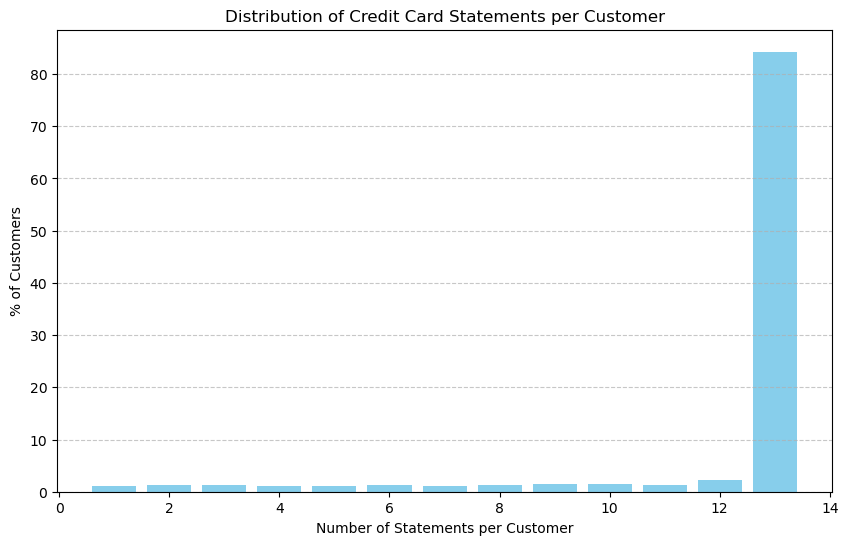

In [11]:
# Count the number of statements per customer
statements_per_customer = data['customer_ID'].value_counts()

# Count the frequency of each count of statements
statements_count_freq = statements_per_customer.value_counts().sort_index()

# Calculate the percentage of customers for each count of statements
total_customers = len(data['customer_ID'].unique())
statements_count_percent = (statements_count_freq / total_customers) * 100

# Plot the distribution of statements per customer
plt.figure(figsize=(10, 6))
plt.bar(statements_count_percent.index, statements_count_percent.values, color='skyblue')
plt.xlabel('Number of Statements per Customer')
plt.ylabel('% of Customers')
plt.title('Distribution of Credit Card Statements per Customer')
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Create a DataFrame from the analysis results
analysis_df = pd.DataFrame({
    'Number of Statements per Customer': statements_count_percent.index,
    '% of Customers': statements_count_percent.values
})
print(tabulate(analysis_df, headers='keys', tablefmt='pretty'))
# Display the DataFrame
print(analysis_df)

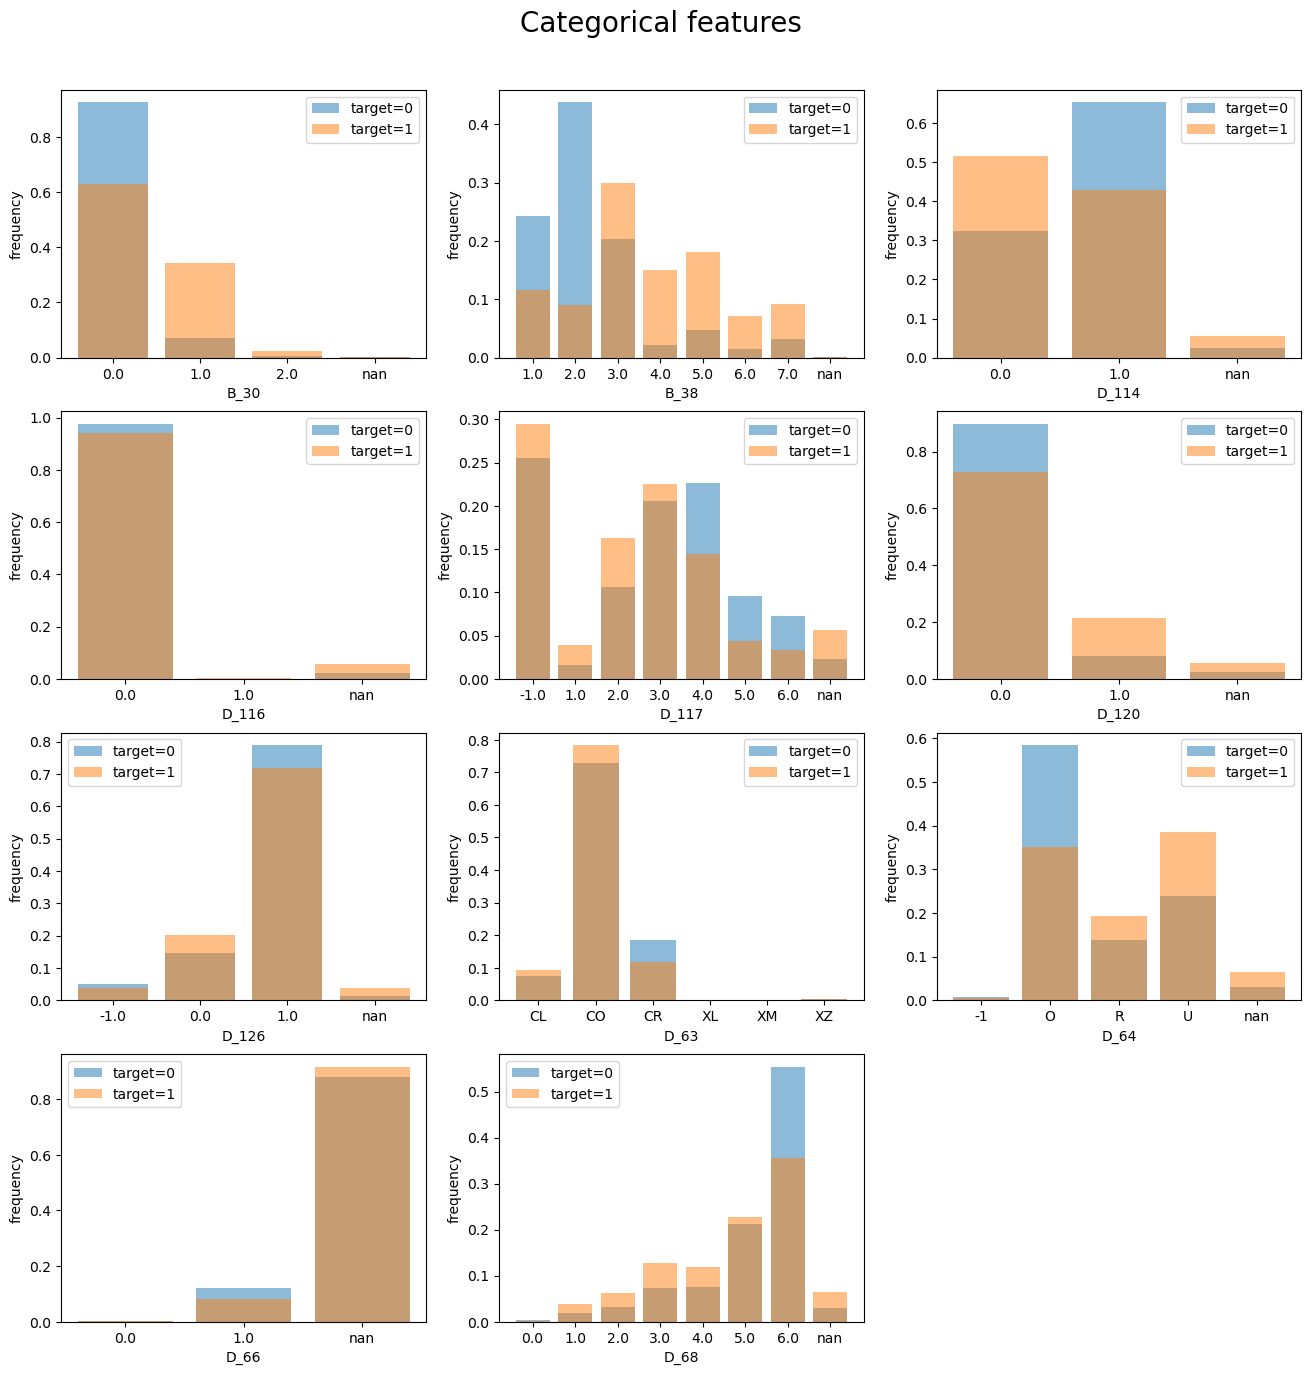

In [12]:
import matplotlib.pyplot as plt
# Now you can use plt to create plots and visualizations

cat_features = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']
plt.figure(figsize=(16, 16))
for i, f in enumerate(cat_features):
    plt.subplot(4, 3, i+1)
    temp = pd.DataFrame(data[f][data.target == 0].value_counts(dropna=False, normalize=True).sort_index().rename('count'))
    temp.index.name = 'value'
    temp.reset_index(inplace=True)
    plt.bar(temp.index, temp['count'], alpha=0.5, label='target=0')
    temp = pd.DataFrame(data[f][data.target == 1].value_counts(dropna=False, normalize=True).sort_index().rename('count'))
    temp.index.name = 'value'
    temp.reset_index(inplace=True)
    plt.bar(temp.index, temp['count'], alpha=0.5, label='target=1')
    plt.xlabel(f)
    plt.ylabel('frequency')
    plt.legend()
    plt.xticks(temp.index, temp.value)
plt.suptitle('Categorical features', fontsize=20, y=0.93)
plt.show()
del temp

In [9]:
# Function to identify binary features
def find_binary_features(df):
    binary_features = []
    for column in df.columns:
        unique_values = df[column].unique()
        if (len(unique_values) == 2):
            binary_features.append(column)
    return binary_features

# Find binary features in the DataFrame
binary_features = find_binary_features(data)

print("Binary features found:", binary_features)

Binary features found: ['target', 'D_87', 'B_31']


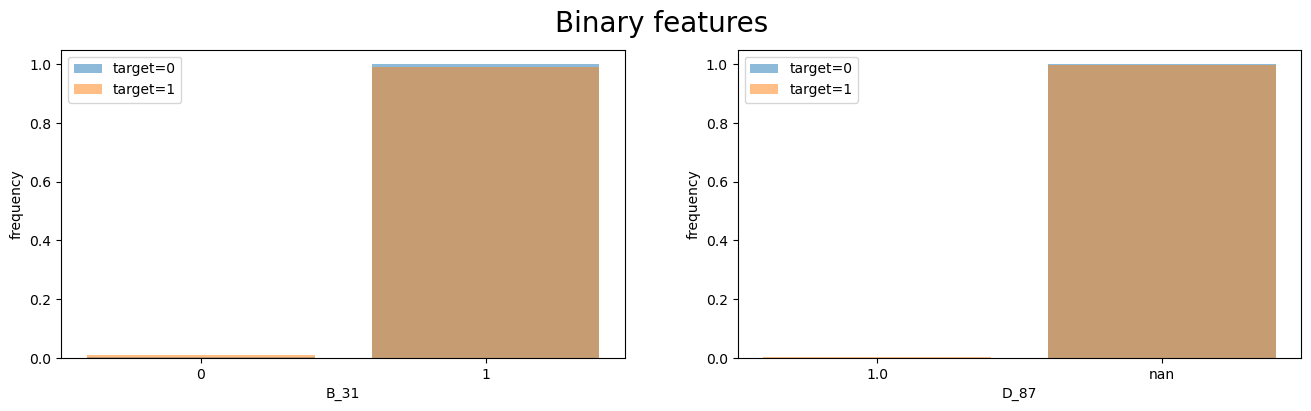

In [13]:
bin_features = ['B_31', 'D_87']
plt.figure(figsize=(16, 4))
for i, f in enumerate(bin_features):
    plt.subplot(1, 2, i+1)
    temp = pd.DataFrame(data[f][data.target == 0].value_counts(dropna=False, normalize=True).sort_index().rename('count'))
    temp.index.name = 'value'
    temp.reset_index(inplace=True)
    plt.bar(temp.index, temp['count'], alpha=0.5, label='target=0')
    temp = pd.DataFrame(data[f][data.target == 1].value_counts(dropna=False, normalize=True).sort_index().rename('count'))
    temp.index.name = 'value'
    temp.reset_index(inplace=True)
    plt.bar(temp.index, temp['count'], alpha=0.5, label='target=1')
    plt.xlabel(f)
    plt.ylabel('frequency')
    plt.legend()
    plt.xticks(temp.index, temp.value)
plt.suptitle('Binary features', fontsize=20)
plt.show()
del temp

Insight: If you impute missing values for D_87, don't fall into the trap of imputing the mean - the feature would become useless...

If we plot histograms of the 175 numerical features, we see that they have all kinds of distributions:

175


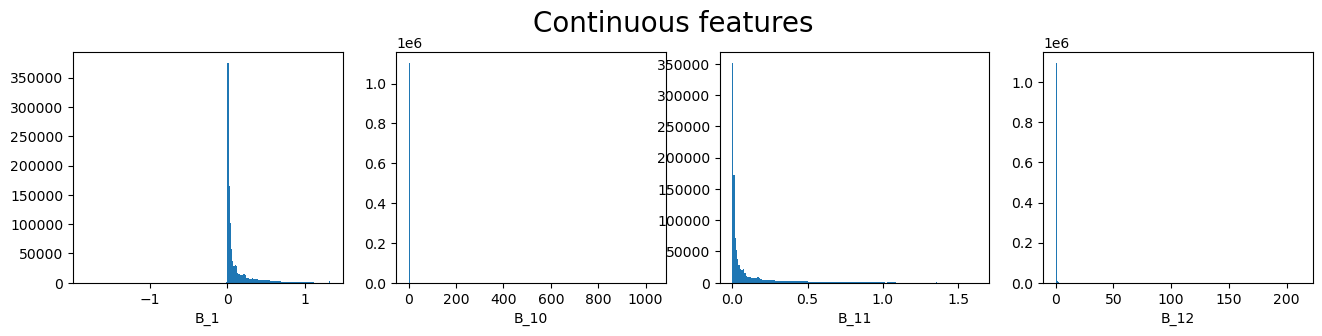

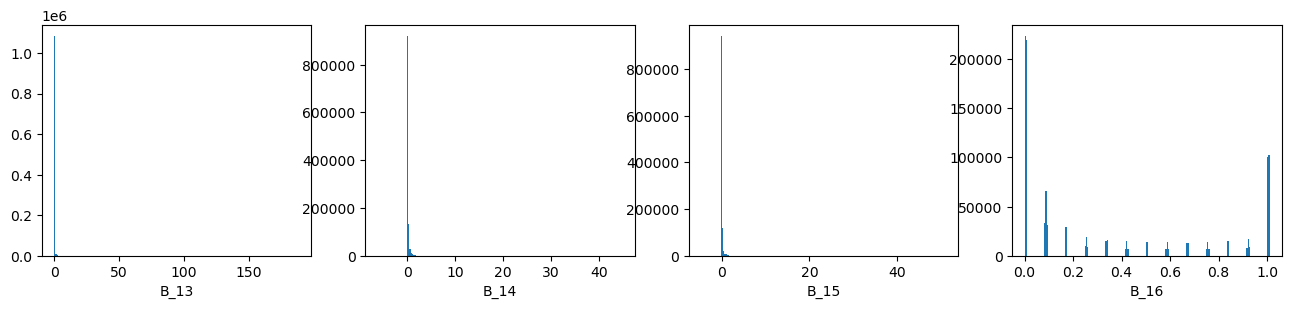

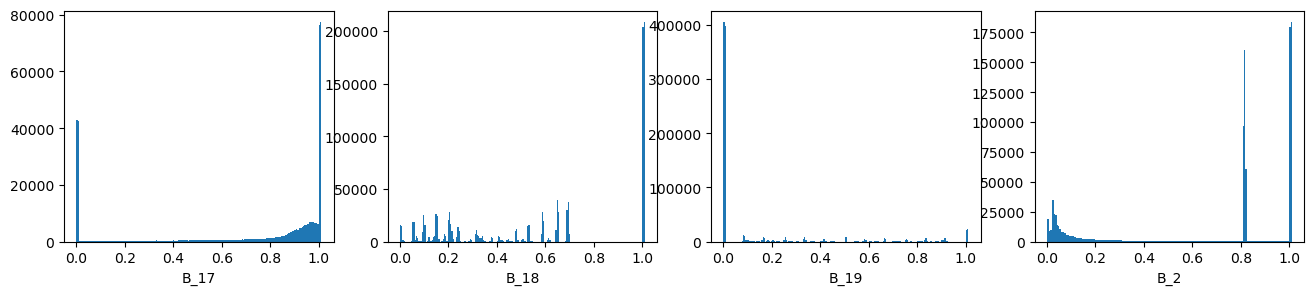

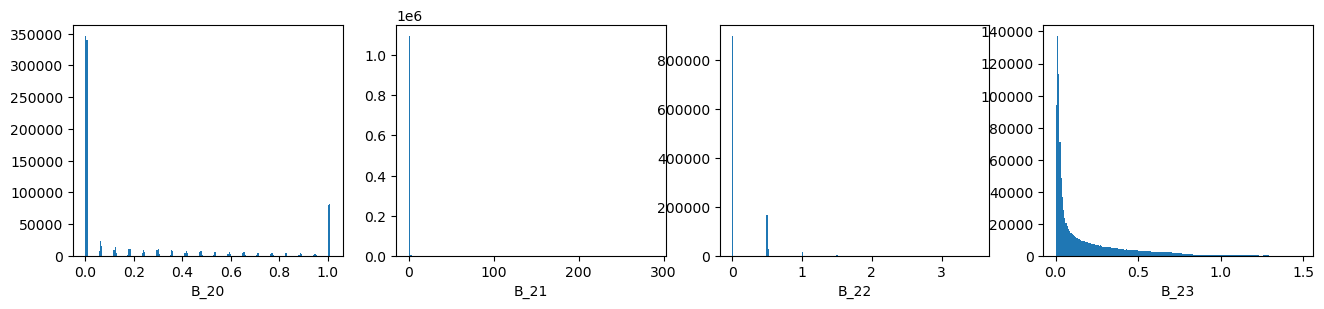

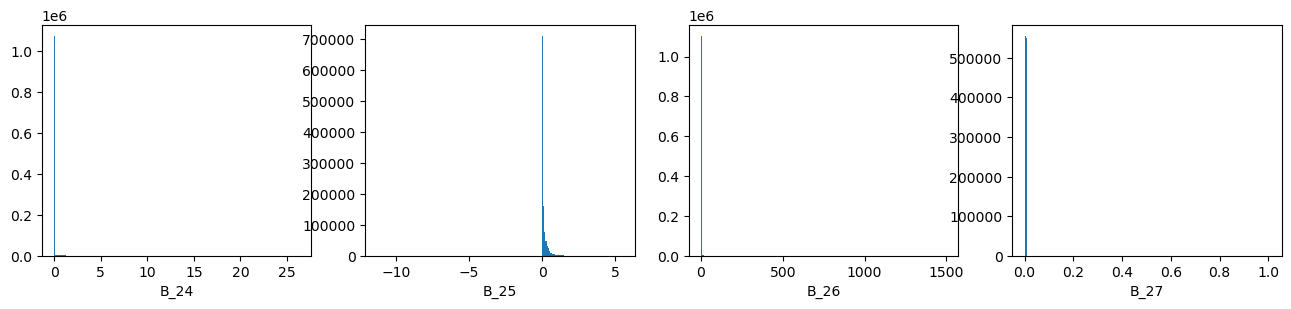

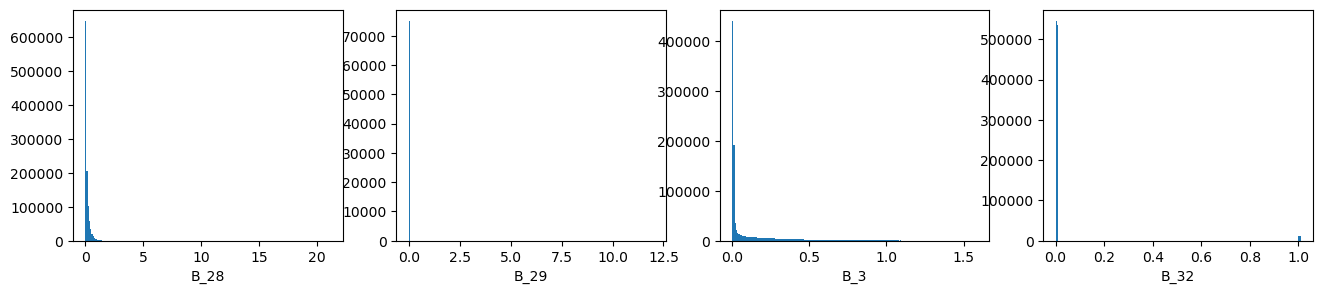

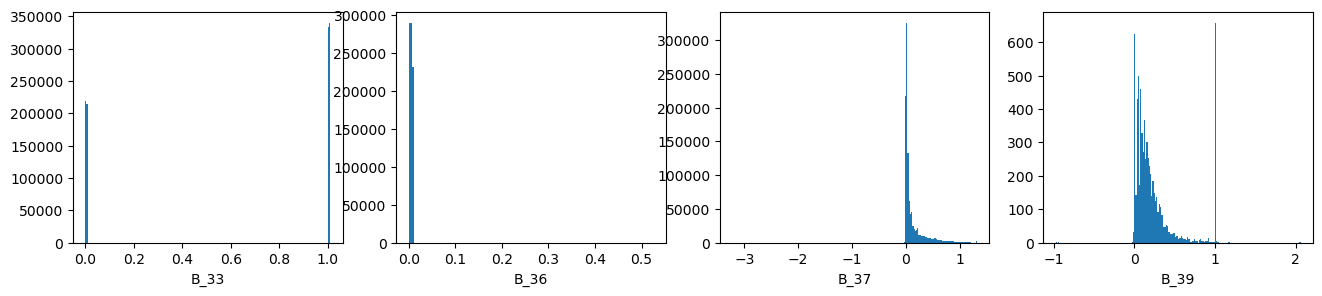

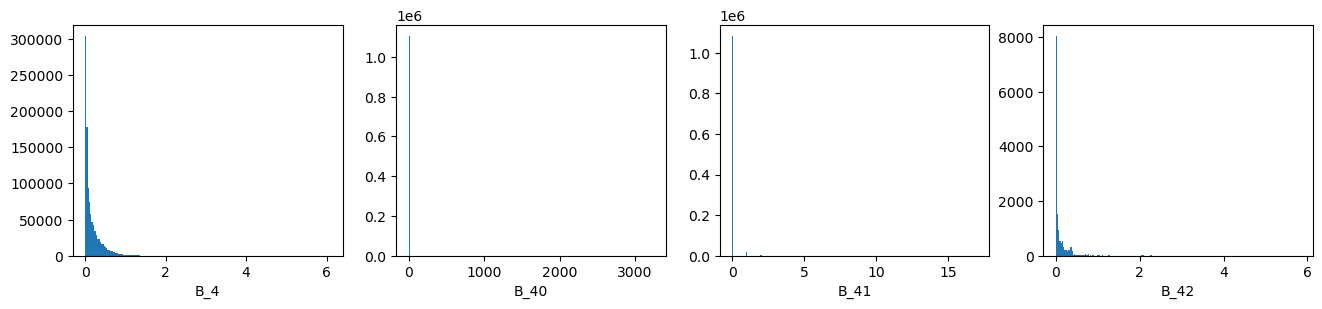

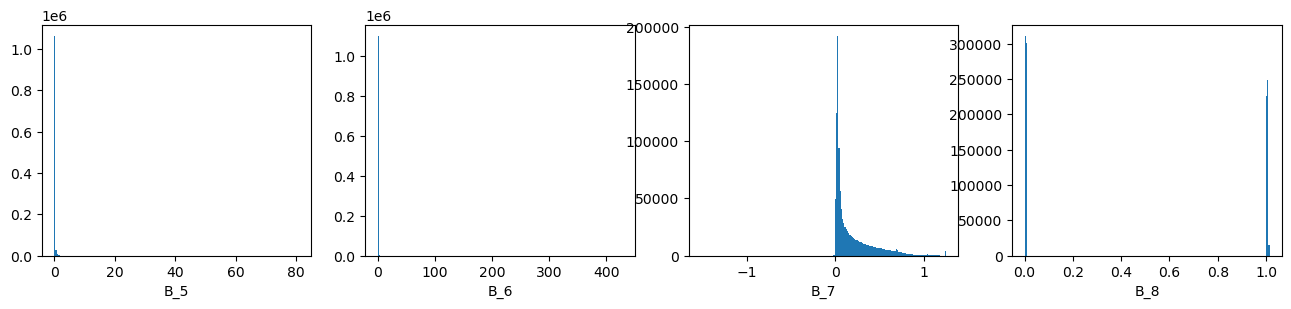

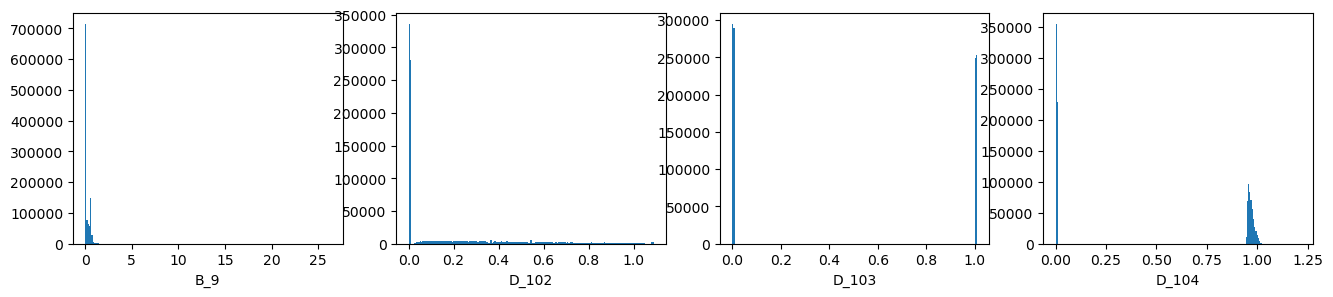

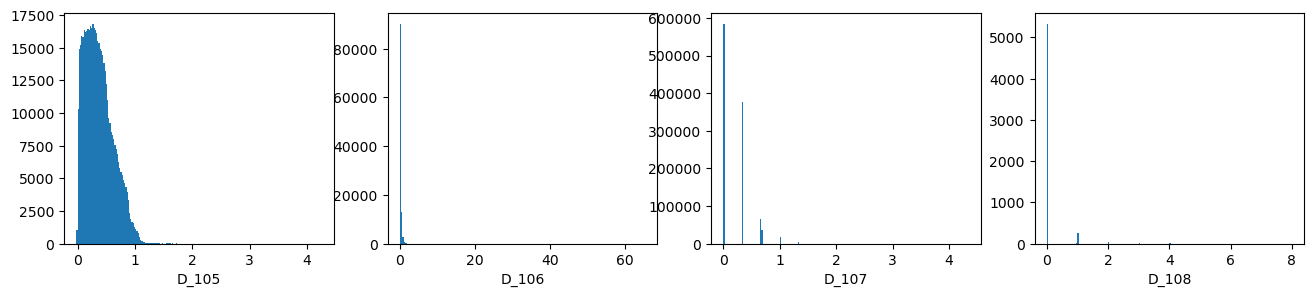

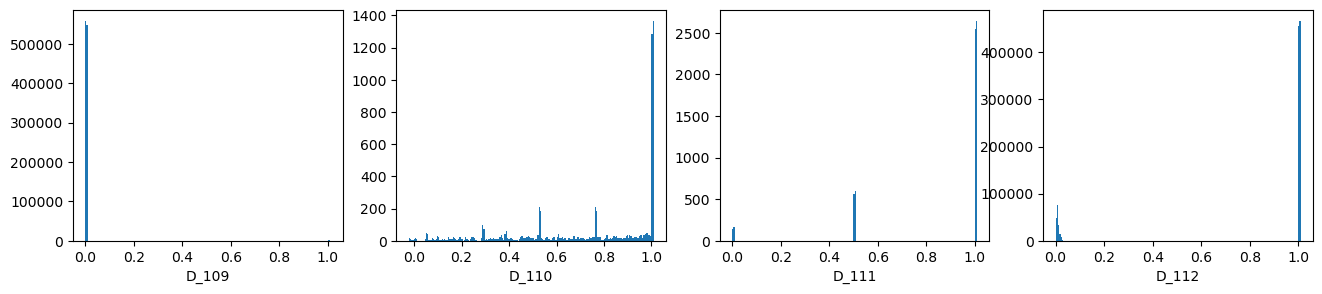

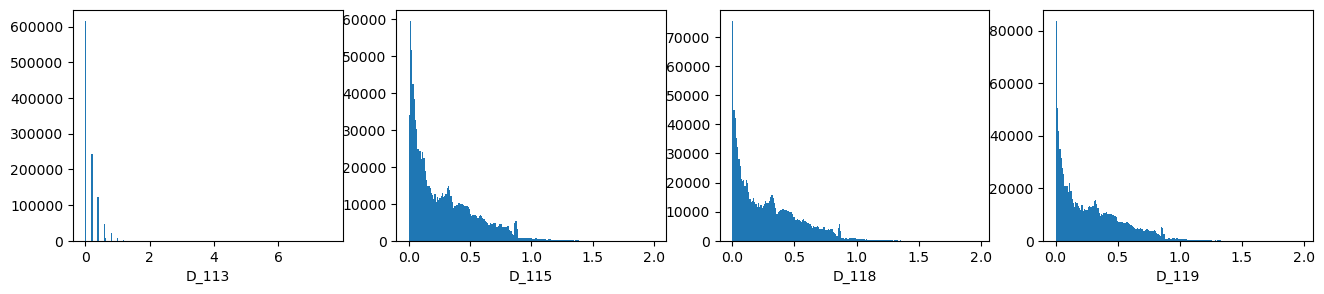

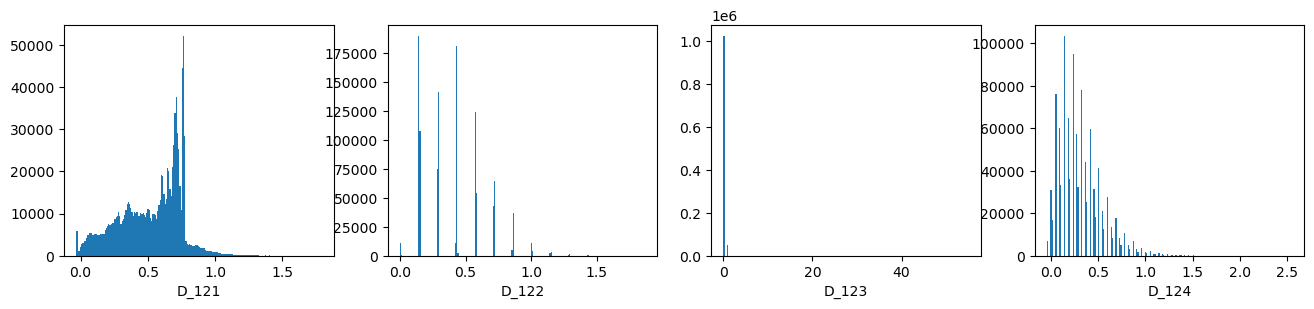

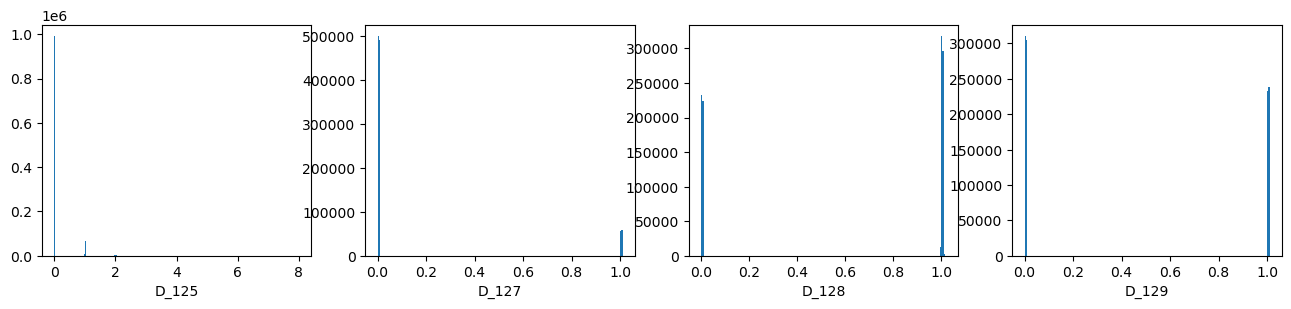

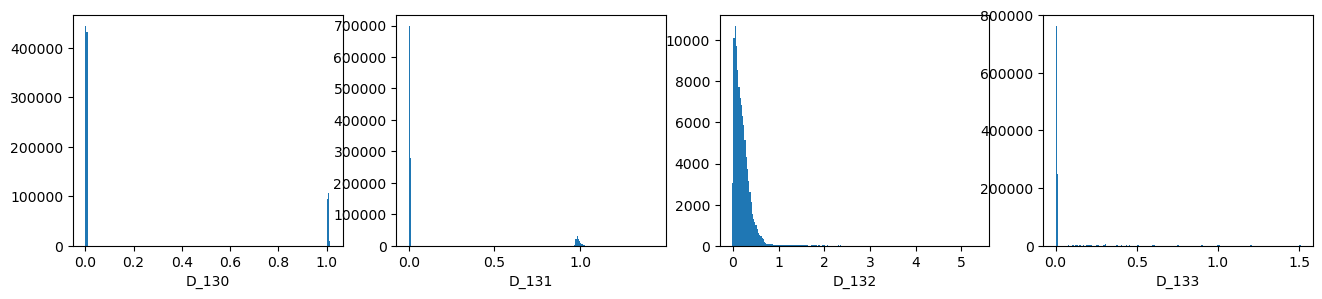

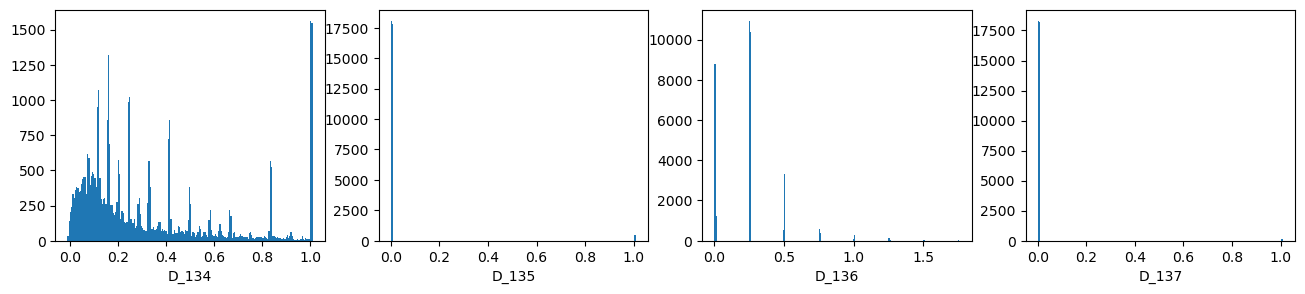

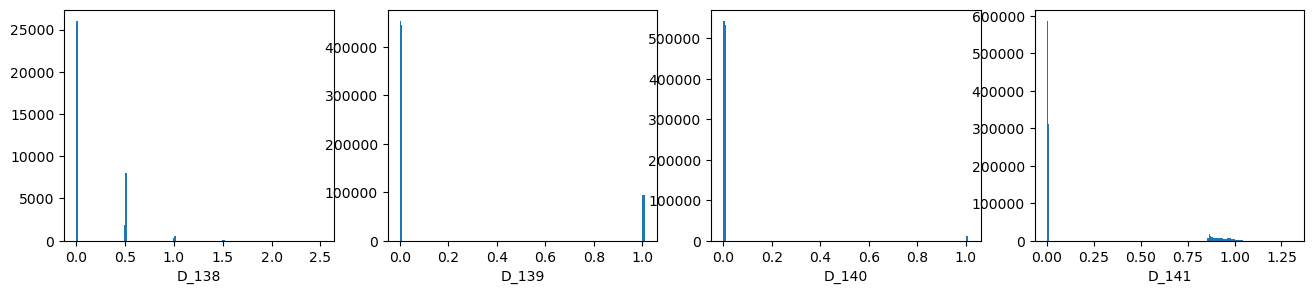

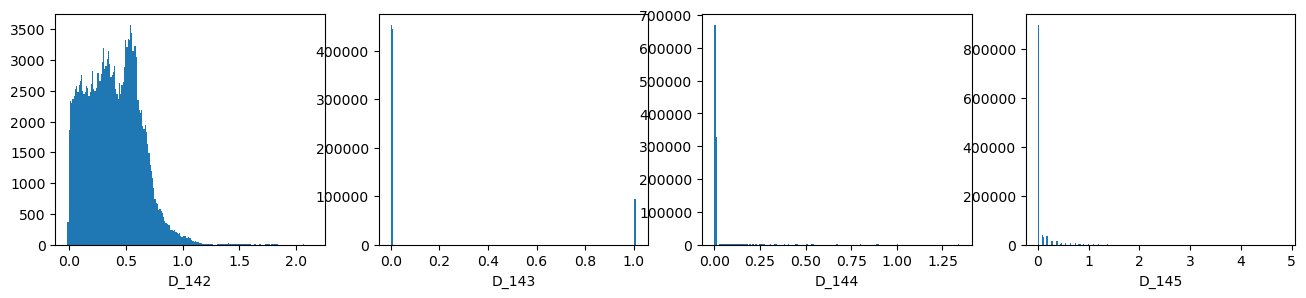

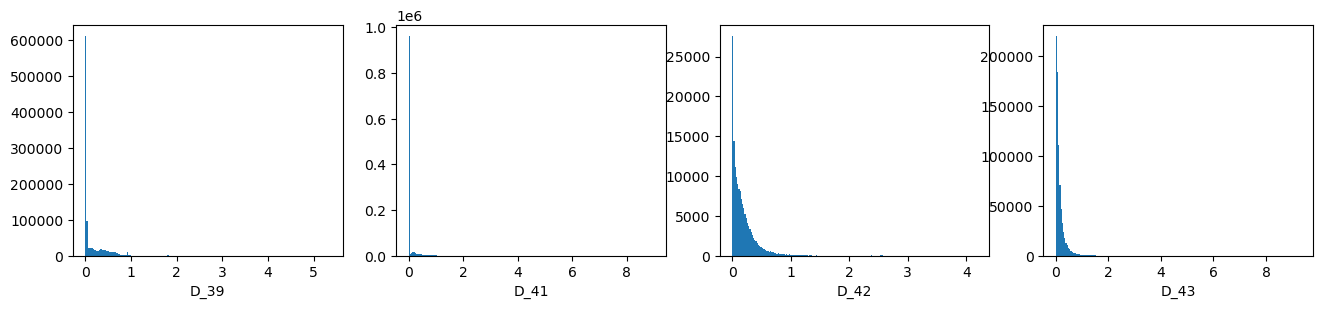

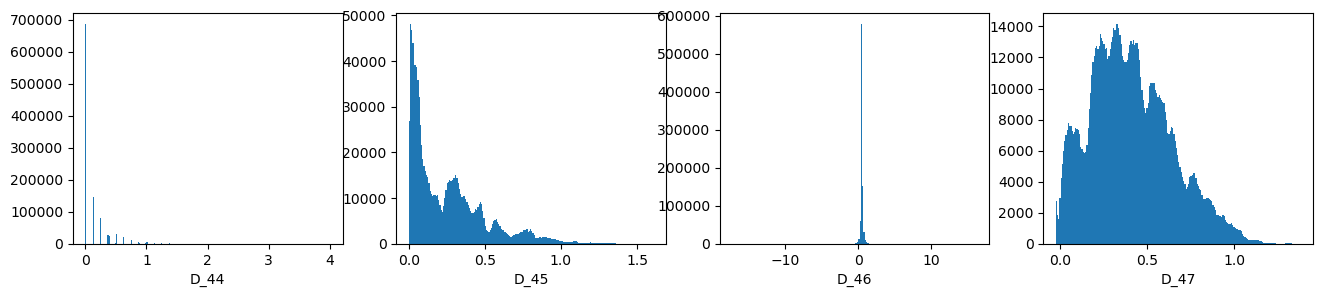

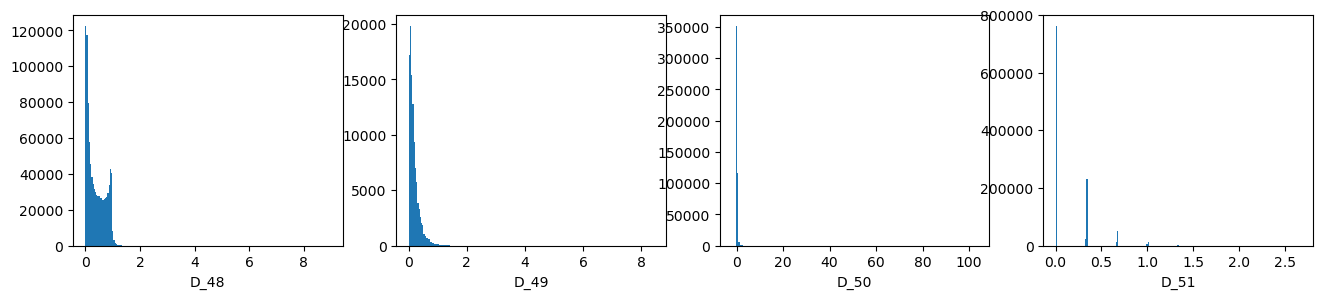

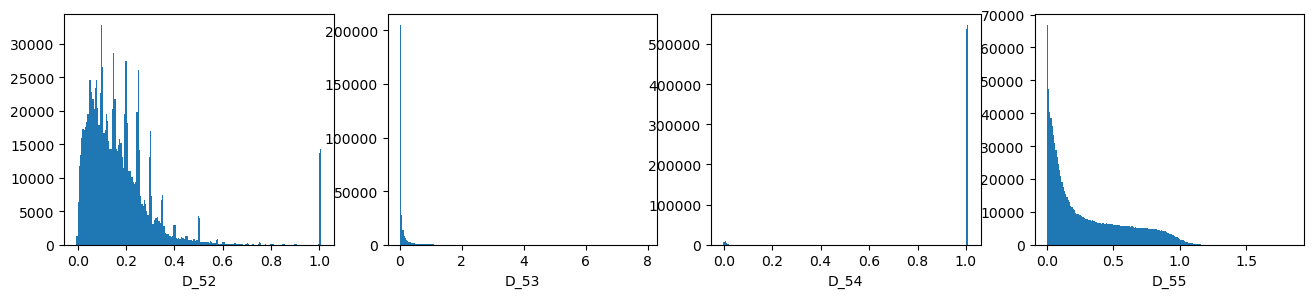

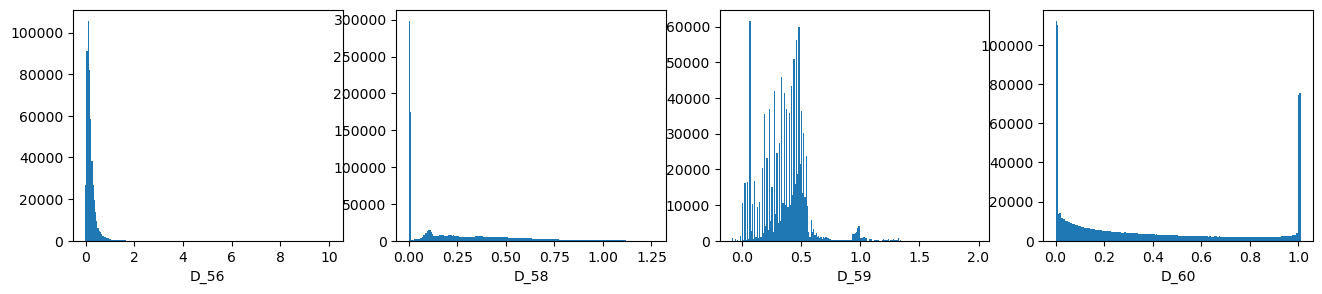

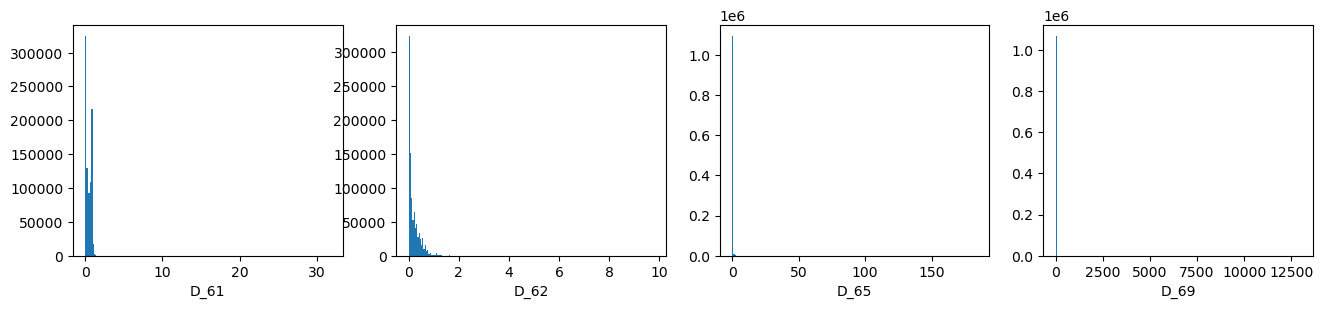

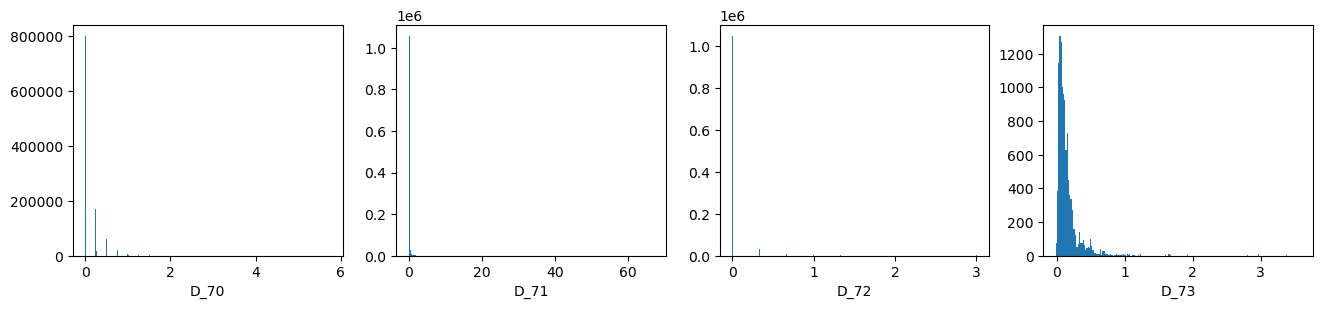

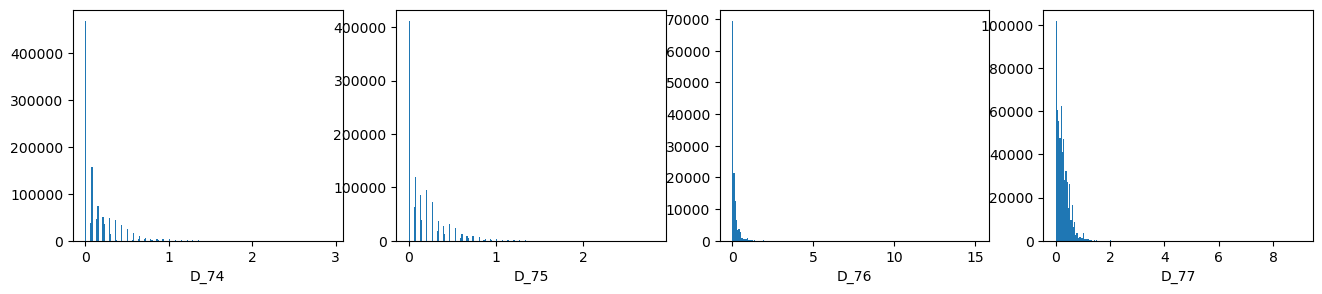

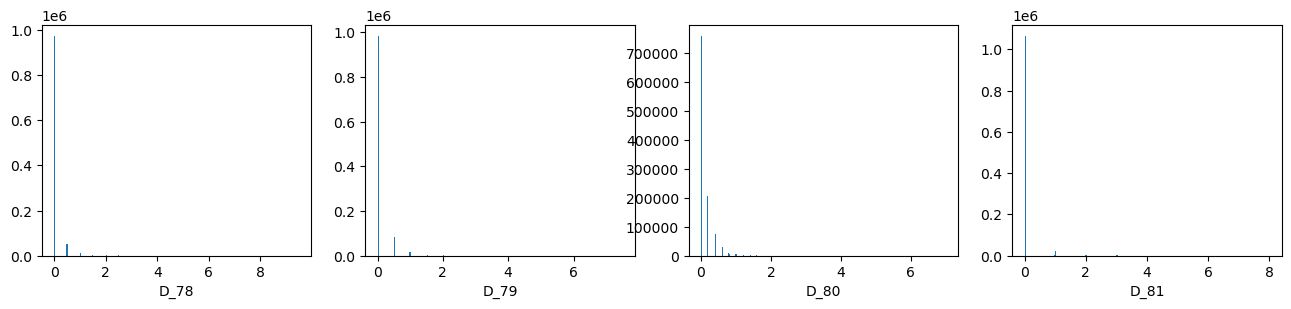

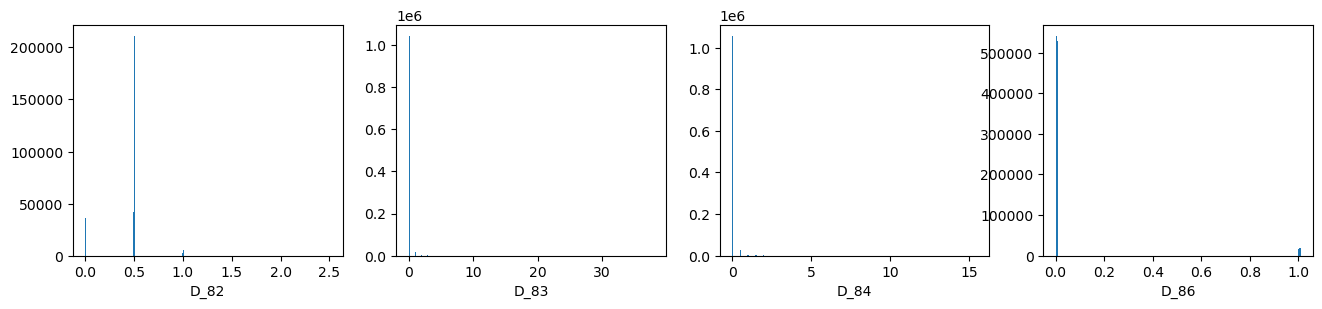

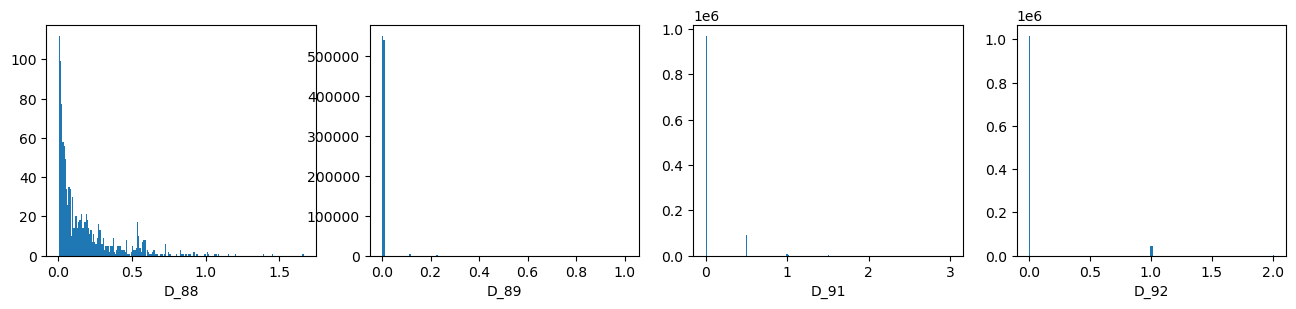

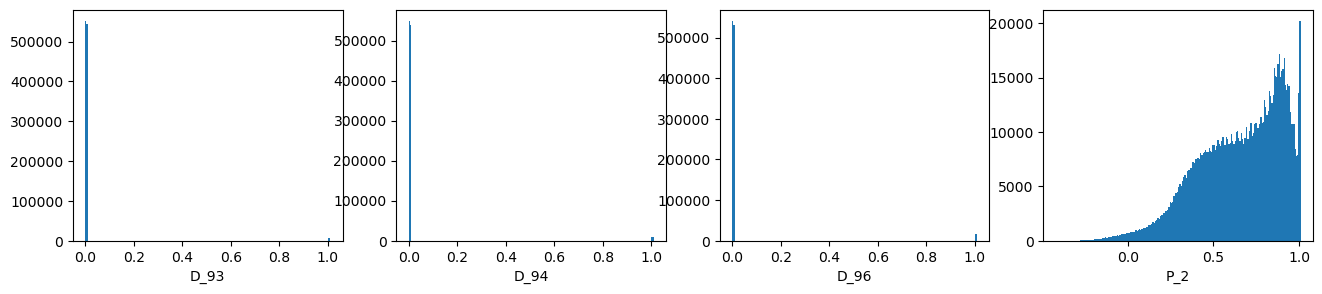

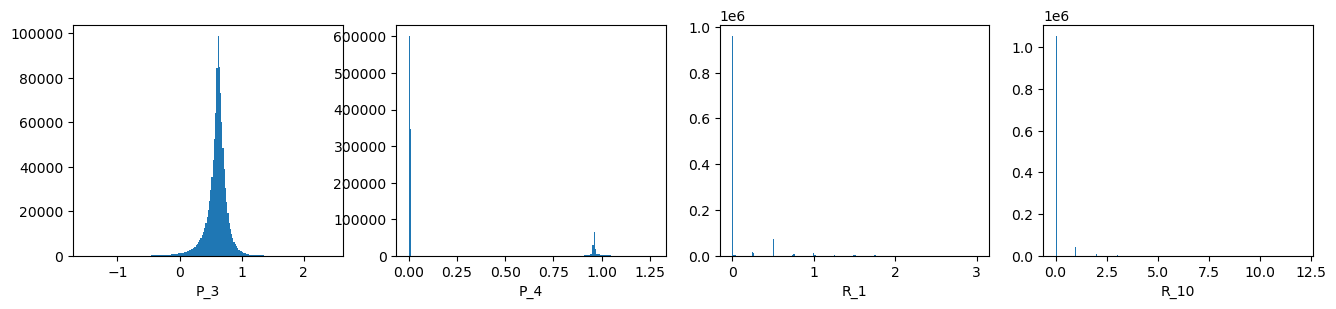

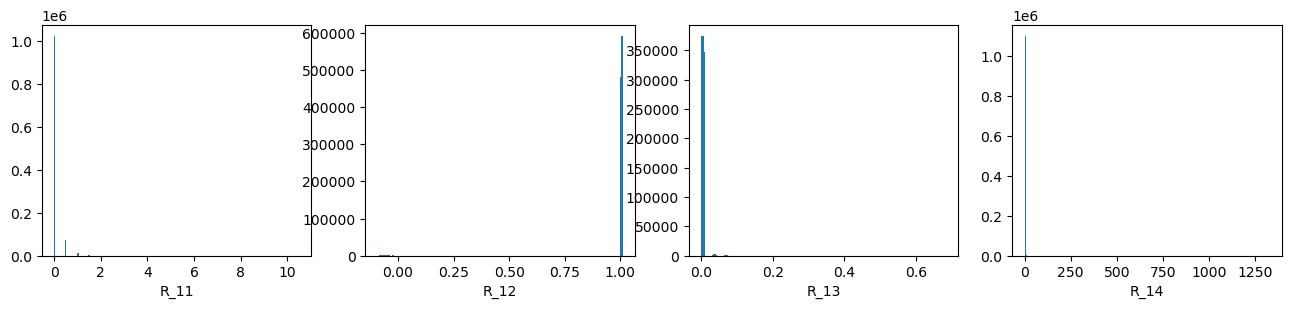

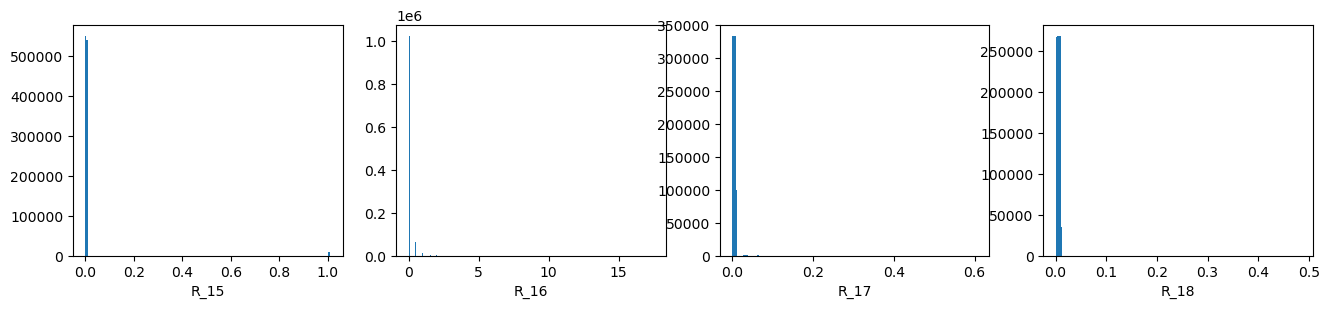

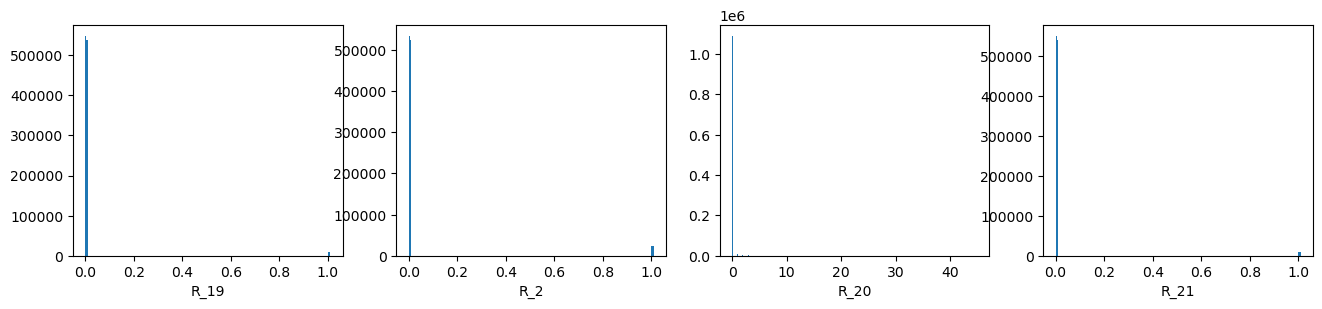

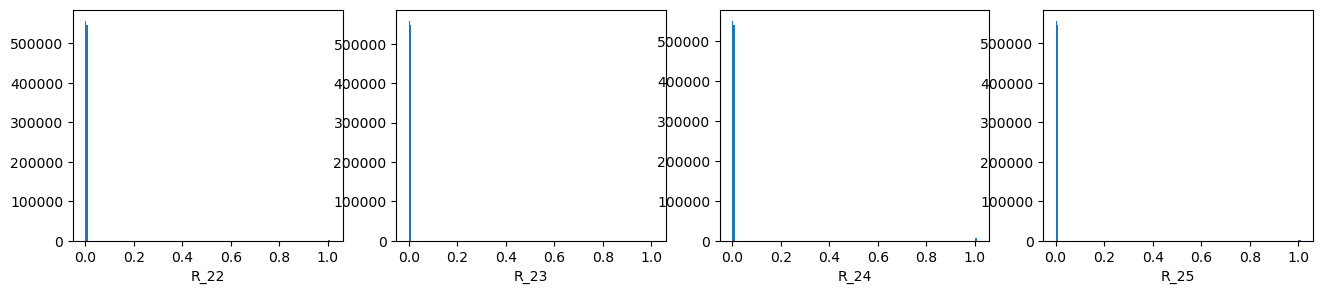

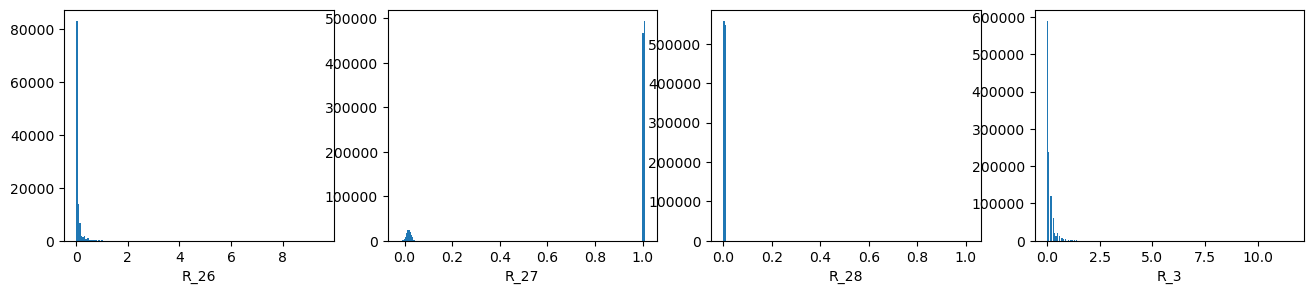

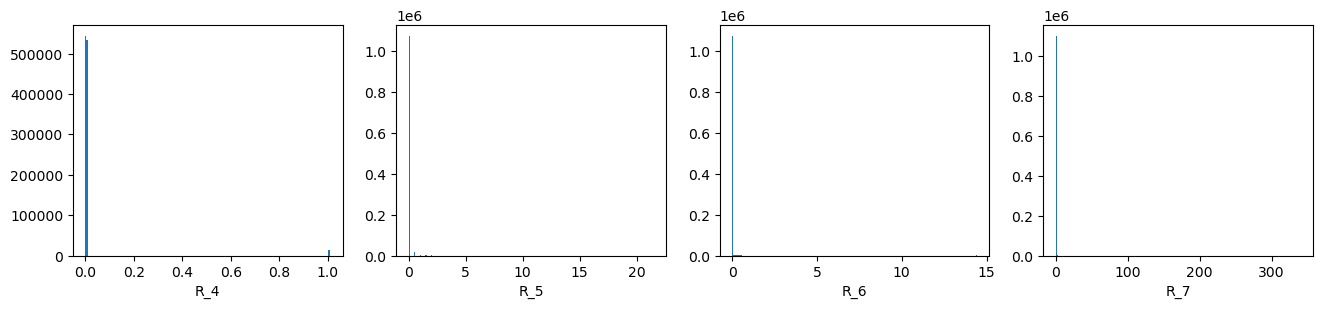

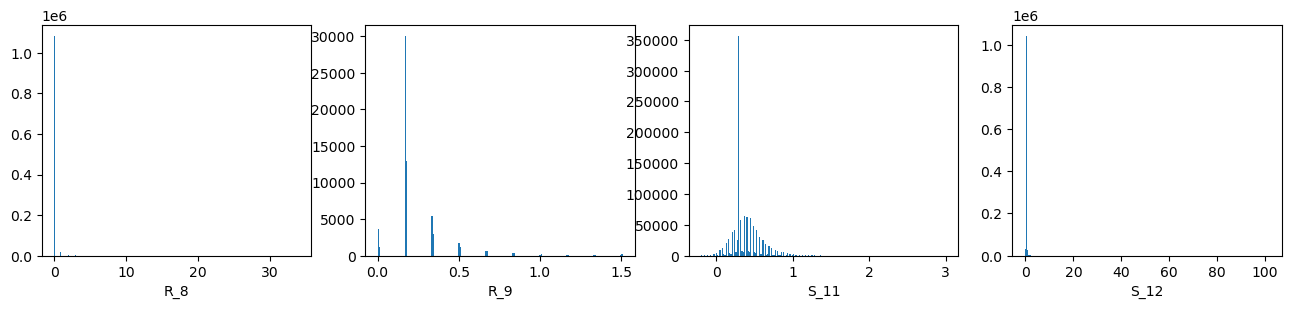

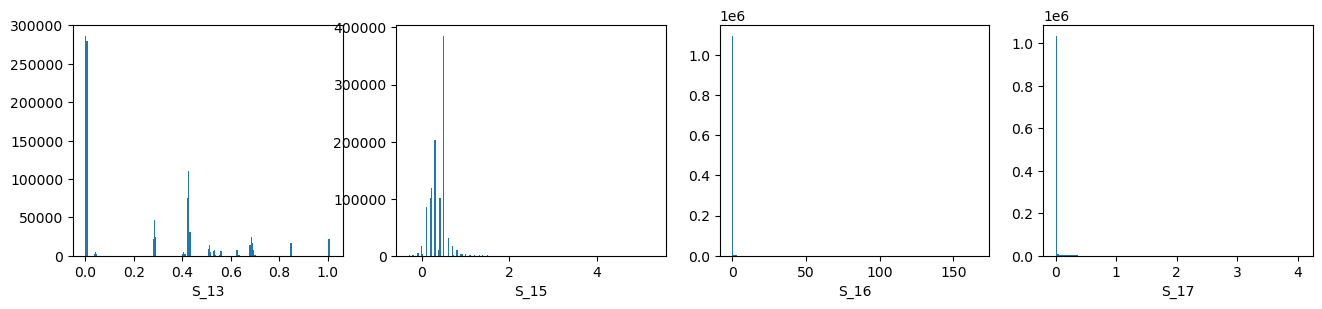

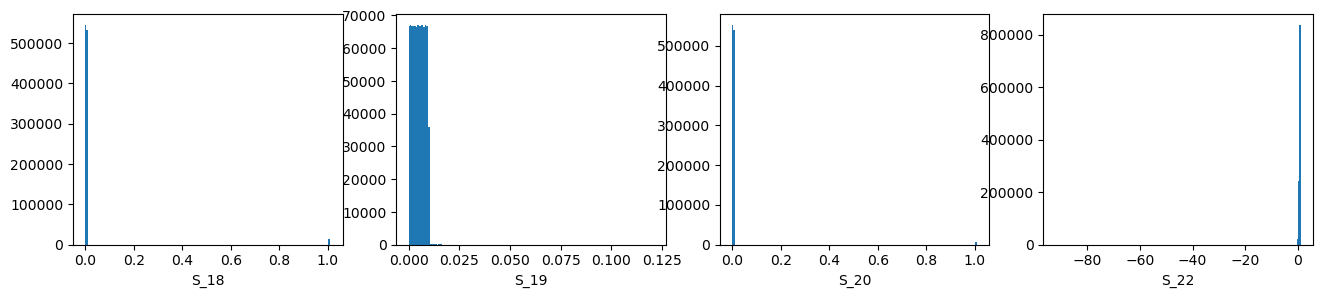

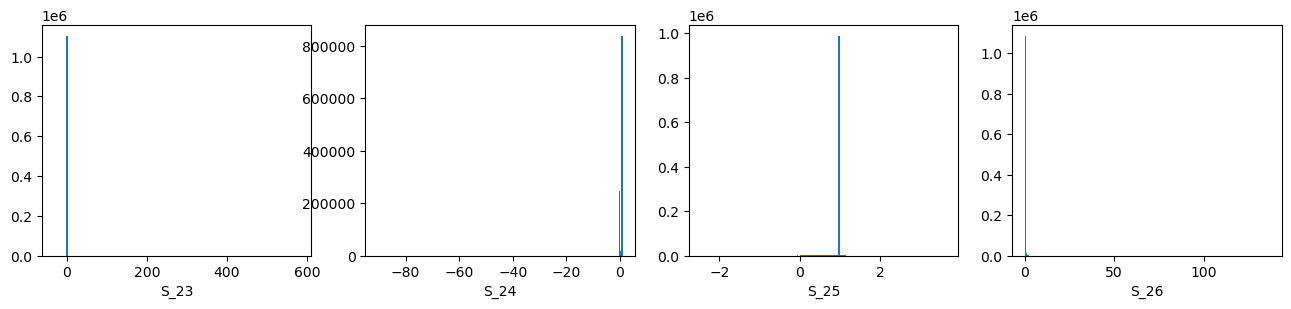

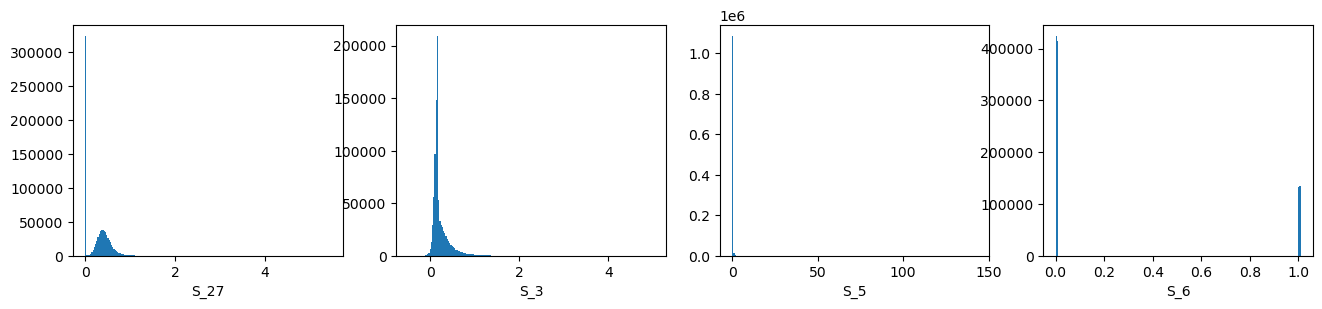

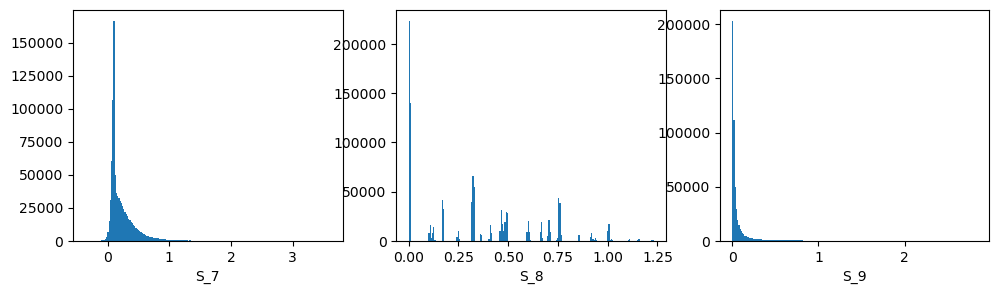

In [14]:
cont_features = sorted([f for f in data.columns if f not in cat_features + bin_features + ['customer_ID', 'target', 'S_2']])
print(len(cont_features))
# print(cont_features)
ncols = 4
for i, f in enumerate(cont_features):
    if i % ncols == 0: 
        if i > 0: plt.show()
        plt.figure(figsize=(16, 3))
        if i == 0: plt.suptitle('Continuous features', fontsize=20, y=1.02)
    plt.subplot(1, ncols, i % ncols + 1)
    plt.hist(data[f], bins=200)
    plt.xlabel(f)
plt.show()

Insight: Histograms with white space at the left or right end can indicate that the data contain outliers. We will have to deal with these outliers. But are these data really outliers? Maybe they are, but they could as well be legitimate traces of rare events. We do not know...

In [15]:
# Step 1: Checking for missing values
missing_values = data.isnull().sum()
print("Missing Values Count: \n", missing_values)

# Step 2: Checking for duplicates
duplicates = data.duplicated().sum()
print("Duplicates Count: ", duplicates)

# If there are duplicates, you can drop them
if duplicates > 0:
    data = data.drop_duplicates()

# Step 3: Convert data types
# Convert 'S_2' column to datetime
data['S_2'] = pd.to_datetime(data['S_2'])

# Snapshot of data after cleaning
print("Snapshot:\n", data['S_2'].head())


Missing Values Count: 
 customer_ID         0
target              0
S_2                 0
P_2              9129
D_39                0
                ...  
D_141           20041
D_142          918619
D_143           20041
D_144            8126
D_145           20041
Length: 191, dtype: int64
Duplicates Count:  0
Snapshot:
 0   2017-03-21
1   2017-04-21
2   2017-05-08
3   2017-06-14
4   2017-07-26
Name: S_2, dtype: datetime64[ns]


In [13]:
pip install xgboost


   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 1.4 MB/s eta 0:01:14
   ---------------------------------------- 0.4/99.8 MB 4.6 MB/s eta 0:00:22
   ---------------------------------------- 0.9/99.8 MB 7.4 MB/s eta 0:00:14
    --------------------------------------- 1.5/99.8 MB 8.9 MB/s eta 0:00:12
    --------------------------------------- 2.1/99.8 MB 9.5 MB/s eta 0:00:11
   - -------------------------------------- 2.7/99.8 MB 10.3 MB/s eta 0:00:10
   - -------------------------------------- 2.9/99.8 MB 8.8 MB/s eta 0:00:12
   - -------------------------------------- 3.4/99.8 MB 9.0 MB/s eta 0:00:11
   - -------------------------------------- 3.9/99.8 MB 9.6 MB/s eta 0:00:10
   - -------------------------------------- 4.5/99.8 MB 9.6 MB/s eta 0:00:10
   -- ------------------------------------- 5.1/99.8 MB 9.9 MB/s eta 0:00:10
   -- ------------------------------------- 5.6/99.8 MB 10.3 MB/s eta 0:00:10
   -

In [15]:
data['B_31'].dtype

dtype('int64')

In [16]:
columns_to_encode = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68'] 
encoded_data = pd.get_dummies(data, columns=columns_to_encode, prefix=columns_to_encode)

In [17]:
new_columns = [col for col in encoded_data.columns if col not in data.columns]

print(new_columns)

['B_30_0.0', 'B_30_1.0', 'B_30_2.0', 'B_38_1.0', 'B_38_2.0', 'B_38_3.0', 'B_38_4.0', 'B_38_5.0', 'B_38_6.0', 'B_38_7.0', 'D_114_0.0', 'D_114_1.0', 'D_116_0.0', 'D_116_1.0', 'D_117_-1.0', 'D_117_1.0', 'D_117_2.0', 'D_117_3.0', 'D_117_4.0', 'D_117_5.0', 'D_117_6.0', 'D_120_0.0', 'D_120_1.0', 'D_126_-1.0', 'D_126_0.0', 'D_126_1.0', 'D_63_CL', 'D_63_CO', 'D_63_CR', 'D_63_XL', 'D_63_XM', 'D_63_XZ', 'D_64_-1', 'D_64_O', 'D_64_R', 'D_64_U', 'D_66_0.0', 'D_66_1.0', 'D_68_0.0', 'D_68_1.0', 'D_68_2.0', 'D_68_3.0', 'D_68_4.0', 'D_68_5.0', 'D_68_6.0']


In [18]:
encoded_data.to_csv('encoded_data.csv', index=False)

In [19]:
# Read data
df = pd.read_csv('encoded_data.csv')
df.head()

,customer_ID,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_64_U,D_66_0.0,D_66_1.0,D_68_0.0,D_68_1.0,D_68_2.0,D_68_3.0,D_68_4.0,D_68_5.0,D_68_6.0
0,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-03-21,0.628534,0.004250,0.017667,0.815468,0.005736,0.265531,0.005933,...,False,False,False,False,False,False,False,False,False,False
1,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-04-21,0.669914,0.418321,0.354284,1.000587,0.009774,0.176196,0.007370,...,False,False,False,False,False,False,False,False,False,False
2,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-05-08,0.661933,0.003989,0.244867,1.008683,0.005743,0.169471,0.005953,...,False,False,False,False,False,True,False,False,False,False
3,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-06-14,0.644270,0.009351,0.017799,0.668398,0.003148,0.174020,0.006656,...,False,False,False,False,False,True,False,False,False,False
4,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-07-26,0.688055,0.002832,0.009458,0.779692,0.000870,0.174547,0.009100,...,False,False,False,False,False,True,False,False,False,False


In [22]:
# Calculate missing data percentage in each column
missing_percentage = df.isnull().sum() * 100 / len(data)
print("Missing Percentage: \n", missing_percentage)

#categorical_columns = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

for column in new_columns:
    df[column] = df[column].fillna(df[column].mode()[0])

for column in df.select_dtypes(include=[np.number]).columns:
    df[column] = df[column].fillna(df[column].mean())

Missing Percentage: 
 customer_ID    0.0000
target         0.0000
S_2            0.0000
P_2            0.8246
D_39           0.0000
                ...  
D_68_2.0       0.0000
D_68_3.0       0.0000
D_68_4.0       0.0000
D_68_5.0       0.0000
D_68_6.0       0.0000
Length: 225, dtype: float64


In [24]:
missing_values = df.isnull().sum()
print("Missing Values Count: \n", missing_values)

Missing Values Count: 
 customer_ID    0
target         0
S_2            0
P_2            0
D_39           0
              ..
D_68_2.0       0
D_68_3.0       0
D_68_4.0       0
D_68_5.0       0
D_68_6.0       0
Length: 225, dtype: int64


4.	Perform One-Hot encoding on categorical variables.

In [27]:
df.shape
print(df.columns)

Index(['customer_ID', 'target', 'S_2', 'P_2', 'D_39', 'B_1', 'B_2', 'R_1',
       'S_3', 'D_41',
       ...
       'D_64_U', 'D_66_0.0', 'D_66_1.0', 'D_68_0.0', 'D_68_1.0', 'D_68_2.0',
       'D_68_3.0', 'D_68_4.0', 'D_68_5.0', 'D_68_6.0'],
      dtype='object', length=225)


In [33]:
df.head()

,customer_ID,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_64_U,D_66_0.0,D_66_1.0,D_68_0.0,D_68_1.0,D_68_2.0,D_68_3.0,D_68_4.0,D_68_5.0,D_68_6.0
0,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-03-21,0.628534,0.004250,0.017667,0.815468,0.005736,0.265531,0.005933,...,False,False,False,False,False,False,False,False,False,False
1,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-04-21,0.669914,0.418321,0.354284,1.000587,0.009774,0.176196,0.007370,...,False,False,False,False,False,False,False,False,False,False
2,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-05-08,0.661933,0.003989,0.244867,1.008683,0.005743,0.169471,0.005953,...,False,False,False,False,False,True,False,False,False,False
3,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-06-14,0.644270,0.009351,0.017799,0.668398,0.003148,0.174020,0.006656,...,False,False,False,False,False,True,False,False,False,False
4,12c761e40348fa242de0356426fa9547f0feea34d1f57b...,0,2017-07-26,0.688055,0.002832,0.009458,0.779692,0.000870,0.174547,0.009100,...,False,False,False,False,False,True,False,False,False,False
